In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Zadanie - estymatory
Sprawdź symulacyjnie nieobciążoność estymatorów wariancji dla
\begin{equation*}
    \hat{\sigma}^2 = S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2,
\end{equation*}
oraz
\begin{equation*}
    \hat{\sigma}^2 = S_n^2 = \frac{1}{n}\sum_{i=1}^n(X_i-\overline{X})^2.
\end{equation*}

1. Wygeneruj próbkę $n$-elementową z wybranego rozkładu.
2. Policz dla wygenerowanej próbki $S^2$ oraz $S_n^2$.
3. Powtórz kroki 1-2 $N$ razy, np. $N=1000$.
4. Policz średnią z wygenerowanych $N$ razy wartości wariancji dla obu estymatorów.
4. Powtórz kroki 1-4 dla róznych liczności $n$, np. dla $n\in[5, 100]$.
5. Narysuj wykres zależności wyestymowanej wartości wariancji dla obu estymatorów w zależności od liczności próbki.
6. Powtórz kroki 1-6 dla innej rodziny rozkładów.

In [2]:
N = 1000

n_vec = np.arange(5, 100, 1)
var0, var1 = np.zeros(len(n_vec)), np.zeros(len(n_vec))

for i, n in enumerate(n_vec):
  
    var0_vec, var1_vec = np.zeros(N), np.zeros(N)
  
    for j in np.arange(N):
        
        x = stats.norm.rvs(size=n, loc=-4, scale=3)  # można wybrać inny rozkład !!
        
        var0_vec[j] = np.var(x, ddof=0)  # estymator obciążony
        var1_vec[j] = np.var(x, ddof=1)  # estymator nieobciążony
  
    var0[i] = np.mean(var0_vec)
    var1[i] = np.mean(var1_vec)

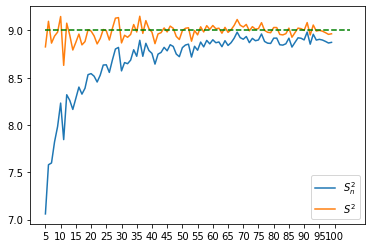

In [7]:
plt.plot(var0, label = '$S^2_n$')  # estymator obciążony
plt.plot(var1, label = '$S^2$')  # estymator nieobciążony

plt.xticks(ticks=np.arange(0, len(n_vec) + 5, 5), labels=np.arange(5, 105, 5))
plt.hlines(xmin=0, xmax=100, y=9, linestyles='--', color='green')
plt.legend()

plt.show()

## Estymacja punktowa - zadania
1. Niech $X_1, \ldots, X_n$ będzie próbą losową z rozkładu gamma $\Gamma(\alpha, \beta)$, gdzie $\alpha, \beta>0$. Stosując metodę momentów wyznaczyć estymatory parametrów $\alpha$ i $\beta$.

**Wskazówka**: Pokaż, że $S_n^2 = \frac{1}{n}\sum_{i=1}^n X_i^2 - \overline{X}^2 = M_2 - M_1^2$.

2. Niech $X_1, \ldots, X_n$ będzie próbą losową z rozkładu wykładniczego $\text{Exp}(\lambda)$, gdzie $\lambda>0$. Stosując metodę największej wiarogodności wyznaczyć estymator parametru $\lambda$.


3. W celu oszacowania niezawodności pewnego urządzenia dokonano 10 pomiarów czasu bezawaryjnej pracy tego urządzenia i otrzymano następujące wyniki (w godzinach): 1119,  627,  790,  626, 1477, 1470, 1466, 1027, 1480,  904. Zakładamy, że czas bezawaryjnej pracy tego urządzenia ma rozkład wykładniczy. \
    a) Znaleźć estymator funkcji niezawodności tego urządzenia. \
    b) Jakie jest prawdopodobieństwo, że dane urządzenie nie ulegnie awarii w ciągu 900 godzin pracy?
    
**Wskazówka**: Funkcja niezawodności: $S(x)=1-F(x)=P(X>x)$.

### Zadanie 1 - metoda momentów
$\mathbb{E}(X) = \frac{\alpha}{\beta}$

$\mathrm{var}(X) = \frac{\alpha}{\beta^2}$

$\hat{\alpha} = \frac{\bar{X}^2}{S_n^2}$

$\hat{\beta} = \frac{\bar{X}}{S_n^2}$

### Zadanie 2 - metoda największej wiarygodności
$X_i \sim \text{Exp}(\lambda), \text{ iid}$ oraz gęstość ma postać $f(x) = \lambda \exp({-\lambda x})$.

1. znaleźć funkcję wiarogodności $L$:
$$
L(x_1, \ldots, x_n, \lambda) = f_{\lambda}(x_1)\cdot\ldots\cdot f_{\lambda}(x_n) = \lambda \exp({-\lambda x_1})\cdot\ldots\cdot \lambda \exp({-\lambda x_n}) = \lambda^n \exp({-\lambda \sum_{i=1}^n x_i}).
$$

2. znaleźć $\ln{L}$:
$$
ln(L) = n \ln{\lambda} - \lambda \sum_{i=1}^n x_i.
$$ 

3. obliczyć pochodną cząstkową: $\frac{\partial}{\partial\lambda}\ln{L}$:
$$
\frac{\partial}{\partial\lambda}\ln{L} = \frac{n}{\lambda} - \sum_{i=1}^n x_i.
$$

4. znaleźć rozwiązanie $\theta_0$ równania $\frac{\partial}{\partial\lambda}\ln{L}=0$:
$$
\frac{n}{\lambda} - \sum_{i=1}^n x_i = 0 \implies \lambda_0 = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{\overline{x}}.
$$

5. sprawdzi, czy w $\theta_0$, funkcja $\ln{L}$ osiąga maksimum:
$$
 \frac{\partial^2}{\partial\lambda^2}\ln{L}\Bigg|_{\lambda=\lambda_0} = -\frac{n}{\lambda^2} < 0.
$$


### Zadanie 3 - metoda momentów
$\mathbb{E} X = \frac{1}{\lambda}$

$ \lambda = \frac{1}{\mathbb{E} X}$

$\hat{\lambda} = \frac{1}{\bar{X}}$

In [9]:
m = np.mean([1119,  627,  790,  626, 1477, 1470, 1466, 1027, 1480,  904])
l = 1/m

In [10]:
exp2 = stats.expon(scale=1/l)

$X$ - czas pracy do wystąpienia awarii

$P(X>900) = 1-P(X\leqslant 900) = 1-F(900)$

In [11]:
1 - exp2.cdf(900)

0.4407733560494924